# Gradiente Descendente

O Gradiente Descente tem por objetivo ser uma alternativa eficiente para a minização da função custo. Partindo de valores randômicos para os parâmetros do modelo, o algoritmo calcula o gradiente da função custo para definir a intensidade e direção da variação a ser aplicada sobre os parâmetros para que iterativamente seja atingido o mínimo local da função custo.

$$\theta = \theta - \alpha*\nabla J(\theta)$$
$$\nabla J(\theta) = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} & , &  ... & , & \frac{\partial J}{\partial \theta_n}\end{bmatrix}^T$$

O gradiente, através das derivadas parciais, determina o grau de inclinação da curva em cada uma das direções. Sendo assim, a cada iteração o algoritmo realiza um decréscimo dos parâmetros do modelo de forma proporcional a inclinação da curva, ou seja, maiores deslocamentos são realizados na direção de maior inclinação. Esta característica é o que permite a adoção de uma taxa de aprendizagem fixa bem como torna o algoritmo eficiente para determinação do mínimo local. A figura abaixo ilustra o processo de otimização da função custo para um modelo univariado.

<img src="imgs/gradient_descent_univariated.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Otimização da função custo de um modelo univariado.
</div>

<br>

O parâmetro $\alpha$, denominado de taxa de aprendizagem, é um valor positivo de tal forma que a diminuição do parâmetro $\theta$ conforme o valor do gradiente visa diminuir o parâmetro caso a inclinação seja positiva e aumentar o parâmetro caso a inclinação seja negativa.

A taxa de aprendizado também regula o tamanho do passo na direção do mínimo e deve ser definido de tal forma a garantir que o próximo custo estimado seja sempre menor ou igual ao atual: 

$$J(\theta - \alpha*\nabla J(\theta)) \leq J(\theta)$$

A seguir, a título de exemplo, é ilustrada a utilização do Gradiente Descendente para minimizar a função custo de um problema de regressão linear.

## Gradiente Descendente na Regressão Linear

A aplicação do gradiente descendente para o problema de regressão linear depende primeiramente da definição do gradiente da função custo. Tomando como custo a metade do MSE, temos:

$$J(\theta) = \frac{MSE}{2} = \frac{1}{2 m} \sum\limits_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^{2}$$

Aplicando o modelo da regressão linear:

$$J(\theta_1, \theta_2) = \frac{1}{2 m} \sum\limits_{i=1}^{m}(\theta_1 + \theta_2 x^{i} - y^{i})^{2}$$

Calculando o gradiente da função custo como a derivada parcial de cada um dos parâmetros do modelo:

$$ \nabla J(\theta_1,\theta_2) = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} , \frac{\partial J}{\partial \theta_2}\end{bmatrix}^T = \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(\theta_1 + \theta_2 x^{i} - y^{i}) & , & \frac{1}{m} \sum\limits_{i=1}^{m}(\theta_1 + \theta_2 x^{i} - y^{i}) x^{i} \end{bmatrix}^T =  \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x^{i}) - y^{i}) & , & \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x^{i}) - y^{i}) x^{i} \end{bmatrix}^T $$

A escolha da função custo como metade do MSE visa permitir a simplificação do termo 2 que, devido a derivada parcial, multiplicaria todo o gradiente. A função abaixo implementa o gradiente calculado:


In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# linear regression hypothesis: o1 + o2*x
def h(x, o):
    m = len(x)
    input = np.zeros((m, 2))
    input[:,0] = np.ones(m)
    input[:,1] = x[:, 0]
    return np.dot(input, o)

# J = MSE/2
def J(x, o, y):
    m = len(x)
    h_x = h(x, o)
    return np.sum(np.power(h_x - y, 2), axis=0)*1/(2*m)

def dJ(x, o, y):
    m = len(x)
    h_x = h(x, o)
    dJ1 = np.sum(h_x - y)*1/m
    dJ2 = np.sum((h_x - y)*x)*1/m
    return np.array([[dJ1],[dJ2]])

A função abaixo implementa a minimização dos parâmetros do modelo através do algoritmo gradiente descendente e retorna: os parâmetros que minimizam a função, todos os parâmetros testados e a quantidade de iterações necessárias para atingir o mínimo local da função.

In [19]:
def gradient_descent(x, o, y, alfa, min_grad, max_iterations):
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        o = o - alfa*grad
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

A condição de parada do algoritmo esta vinculada a obtenção do mínimo local, caso em que o módulo do gradiente da função custo se aproxima de zero. Entretanto, é comum em algoritmos de otimização também prever uma quantidade máxima de iterações com o objetivo de previnir laços infinitos em caso de divergência.

A função a seguir plota o resultado da comparação do modelo obtido com os dados de treinamento.

In [38]:
def plot_comparison_to_training(x, min_o, y):
    h_x = h(x, min_o)
    
    plt.figure(figsize=(13,6))
    plt.plot(x, y, '*')
    plt.plot(x, h_x)
    plt.legend(['y', 'h_x = ' +  str(round(min_o[0,0],2)) + ' + ' + str(round(min_o[1,0],2)) + '*x'])

O Script abaixo define um conjunto de treinamento arbitrário para a função $y$ e através de um ponto de partida aleatório executa o algoritmo gradiente descendente para minimizar os parâmetros do modelo.

iterations: 1234


<IPython.core.display.Javascript object>


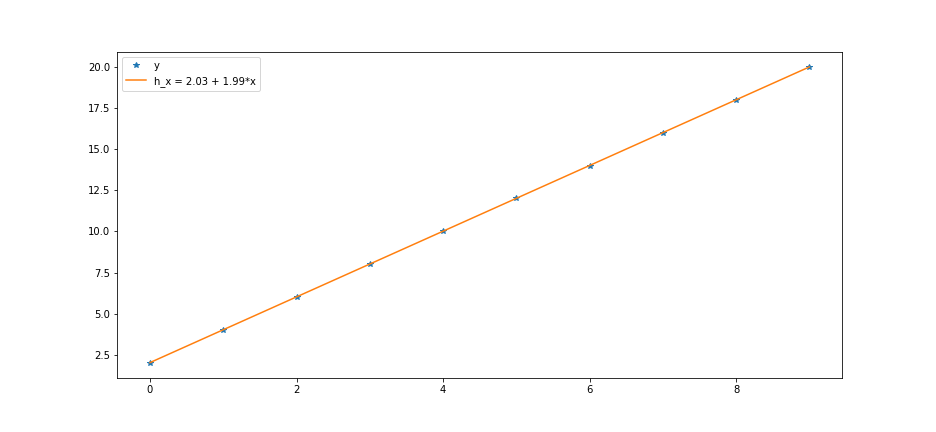

In [39]:
# config gradient descent
max_iterations = 10000
alpha = 1.5e-2
min_grad = 1e-2

# define training data
x = np.arange(0, 10, 1)
m = len(x)
x = np.reshape(x, [m, 1])
y = 2 + 2*x 

# execute gradient descent to minimize o
o_start = [[10],[10]] # arbitrary start
[min_o, o_hist, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)

# plot result
print('iterations:', iterations)
plot_comparison_to_training(x, min_o , y)

É evidente a existência de um tradeoff. A precisão do algoritmo está diretamente relacionada a definição da condição de parada min_grad, afinal quanto menor definimos min_grad mais o modelo estimado se aproxima da função real. Entretanto, a diminuição de min_grad também implica em uma maior quantidade de iterações o que reflete o aumento de custo computacional do algoritmo.

A função abaixo mostra os deslocamentos realizados pelo gradiente descendente sobre os parâmetros do modelo em conjunto com a superfície e as curvas de nível que representam a variação da função custo.

In [40]:
def plot_route(x, o_hist, y):
    # arbitrary data to visualize cost function
    o1 = np.arange(-10, 10, 0.25)
    o2 = np.arange(-10, 10, 0.25)

    # prepare data in meshgrid format
    X, Y = np.meshgrid(o1, o2)
    
    # serialize meshgrid to use J
    c_o = np.power(len(o1), 2)
    o = np.zeros((2, c_o))
    o[0, :] = np.reshape(X, [1, c_o])
    o[1, :] = np.reshape(Y, [1, c_o])
    j = J(x, o, y)

    # transform j to meshgrid
    Z = np.reshape(j, np.shape(X))
    
    # get gradient descent route
    j = J(x, o_hist, y)
        
    # plot surface
    fig = plt.figure(figsize=(13,6))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlabel(r'$\theta_{1}$')
    ax.set_ylabel(r'$\theta_{2}$')
    
    ax.plot_surface(X, Y, Z, alpha=0.2)
    ax.plot(o_hist[0,:], o_hist[1,:], j, linestyle='--', marker='o')
    
    # plot contours    
    plt.subplot(1, 2, 2)
    levels = [10, 50, 100, 250, 500, 750, 1000] # to improve view 
    contours = plt.contour(X, Y, Z, levels, colors='black')
    plt.plot(o_hist[0,:], o_hist[1,:], '*')

    plt.clabel(contours, inline = True, fontsize = 10)
    plt.xlabel(r'$\theta_{1}$')
    plt.ylabel(r'$\theta_{2}$')

As figuras abaixo ilustram a minimização dos parâmetros do modelo partindo do ponto arbitrário $(10,10)$. A escolha deste ponto visa mostrar que mesmo a distância entre a posição inicial e o mínimo local da função sendo igual para ambos os parâmetros, os deslocamentos maiores são realizados na direção de $\theta_2$. Esta característica se deve ao fato da inclinação na direção de $\theta_2$ ser muito superior a inclinação na direção de $\theta_1$, ou seja, uma variação de $\theta_2$ impacta mais no custo se comparada a uma variação de $\theta_1$.

<IPython.core.display.Javascript object>


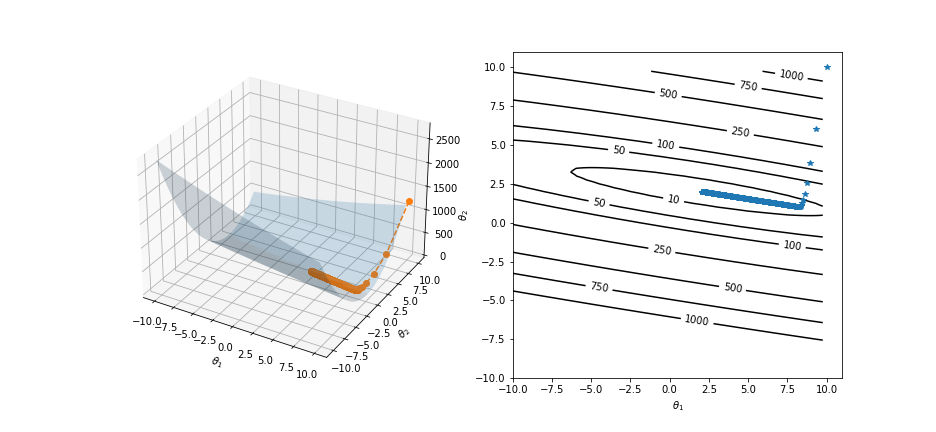

In [41]:
plot_route(x, o_hist, y)

As funções abaixo mostram uma animação que representa o processo de ajuste da linha do modelo aos dados do treinamento através do algoritmo gradiente descendente.

In [42]:
global anim 

def animate(j, line):
    global anim 

    h_x = h(x, o_hist[:, j])

    line.set_data((x, h_x))
    plt.legend(['y', 'iter: ' + str(j) + ', equ: ' + str(round(o_hist[0,j],2)) + ' + (' + str(round(o_hist[1,j], 2)) + '*x)'])
    return line,
    
def show_animation(x, o_hist, y):
    global anim 

    fig, ax = plt.subplots(figsize=(13,6))
    line, = ax.plot([])     # A tuple unpacking to unpack the only plot

    plt.plot(x, y, '*', label='y')
    anim = FuncAnimation(fig, animate, repeat = False, frames=np.shape(o_hist)[1], blit=True, fargs=(line,), interval=1)
    plt.show()

<IPython.core.display.Javascript object>


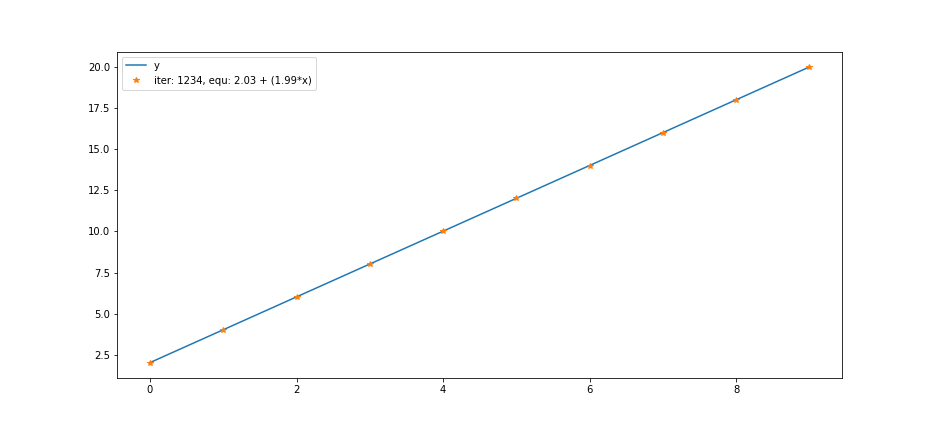

In [43]:
show_animation(x, o_hist, y)